## Outliners, Linear Regressions, and Correlations 

In [443]:
# import Dependencies
import pandas as pd
import csv as csv

import  numpy as np
import scipy as sts
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [444]:
# Path csv
path = "Resources/movie_list.csv"

# Read in csv
csv = pd.read_csv(path)

# Need to fill empty sections with "Nan" so that we can use .dropna and remove rows with empty data
nan_value = float("NaN")
# Use .replace to replace " "(empty data), with nan_value, inplace=True
csv.replace(" ", nan_value, inplace=True)
# Use .dropna with inplace=True to drop NaN values
csv.dropna(inplace=True)

In [445]:
# Creat clean csv 
clean_csv = csv
#clean_csv.head()

# Save clean_csv
clean_csv.to_csv("Resources/clean_csv.csv")

## Check for any Outliers for Total Profit amounts

In [446]:
# Confirm all data is equal
#clean_csv.count() # 563 total count

# Sort "Profit%" for quartile data
sorted_csv = clean_csv.sort_values("Profit%", ascending=True)

# Set variable to check for outliers
profit = sorted_csv["Profit%"]

<Figure size 2160x1440 with 0 Axes>

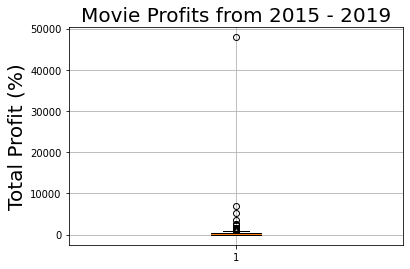

<Figure size 432x288 with 0 Axes>

In [447]:
# Set up for plot
plt.figure(figsize=(30, 20))
fig1, ax1 = plt.subplots()

# Assign titles and fontsize
ax1.set_title('Movie Profits from 2015 - 2019', fontsize=20)
ax1.set_ylabel('Total Profit (%)', fontsize=20)

# Set plot to profit
ax1.boxplot(profit)

# Add gird and display plot
plt.grid()
plt.show()

# Get quartiles, lower, upper and iqr
quartiles = profit.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print results
# print(f"The lower quartile of movie profits is: {lowerq}")
# print(f"The upper quartile of movie profits is: {upperq}")
# print(f"The interquartile range of movie profits is: {iqr}")
# print(f"The the median of movie profits is: {quartiles[0.5]} ")

# Get lower and upper bound figures
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print results
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

# Save 
plt.savefig("Images/quartile_plot.png")

## Quartile results for movie profit

* The lower quartile of movie profits is: -26%

* The upper quartile of movie profits is: 289%

* The interquartile range of movie profits is: 315%

* The the median of movie profits is: 82%

* Values below -500% could be outliers.

* Values above 763% could be outliers.

## Need to remove outlier 

* tconst: tt6108090 (Secret Supertar) needs to be removed as it an outlier with a gap over 40,000% from the rest of the population. 

In [448]:
# Use .grouby for ("genres")
genres = clean_csv.groupby("genres")
# Create genres_count for bar chart
genres_count = genres["genres"].count()
#genres_count

In [449]:
# Using clean_csv use sort_values to "Profit" and ascending=False to identify highest profit (outlier)
clean_csv.sort_values("Profit%", ascending=False)

,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
388,89,tt6108090,2017-10-19,286284,137416709,Drama,हिन्दी,IN,India,हिन्दी,47900.14
429,130,tt6777338,2017-06-08,125000,8737458,Drama,한국어/조선말,KR,South Korea,한국어/조선말,6889.97
35,35,tt2558022,2016-02-18,10000,525000,Action,Deutsch,DE,Germany,Deutsch,5150.00
95,95,tt4527664,2015-04-04,1500,53889,Comedy,English,US,United States of America,English,3492.60
270,140,tt5824826,2016-07-29,200000,5500000,Romance,తెలుగు,IN,India,తెలుగు,2650.00
...,...,...,...,...,...,...,...,...,...,...,...
470,16,tt3956336,2018-09-21,2000000,2231,Adventure,English,US,United States of America,English,-99.89
339,40,tt4400994,2017-12-15,8000000,7856,Western,English,US,United States of America,English,-99.90
513,59,tt6749318,2018-11-16,15000000,5812,Crime,English,PR,Puerto Rico,English,-99.96
237,107,tt5096536,2016-11-01,10000000,3176,Drama,Deutsch,BE,Belgium,Deutsch,-99.97


In [450]:
# use drop for index 388 which is tt6108090 (outlier)
csv_without_outlier = clean_csv.drop([388])

In [451]:
csv_without_outlier.head()

# Using csv_without_outlier sort_values to "Profit" and ascending=False to confirm highest profit (outlier) has been removed
csv_without_outlier.sort_values("Profit%", ascending=False) # Removed and count is now 562

,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
429,130,tt6777338,2017-06-08,125000,8737458,Drama,한국어/조선말,KR,South Korea,한국어/조선말,6889.97
35,35,tt2558022,2016-02-18,10000,525000,Action,Deutsch,DE,Germany,Deutsch,5150.00
95,95,tt4527664,2015-04-04,1500,53889,Comedy,English,US,United States of America,English,3492.60
270,140,tt5824826,2016-07-29,200000,5500000,Romance,తెలుగు,IN,India,తెలుగు,2650.00
493,39,tt5613484,2018-10-19,258158,6897446,Drama,English,US,United States of America,English,2571.79
...,...,...,...,...,...,...,...,...,...,...,...
470,16,tt3956336,2018-09-21,2000000,2231,Adventure,English,US,United States of America,English,-99.89
339,40,tt4400994,2017-12-15,8000000,7856,Western,English,US,United States of America,English,-99.90
513,59,tt6749318,2018-11-16,15000000,5812,Crime,English,PR,Puerto Rico,English,-99.96
237,107,tt5096536,2016-11-01,10000000,3176,Drama,Deutsch,BE,Belgium,Deutsch,-99.97


In [452]:
csv_without_outlier.to_csv("Resources/csv_without_outlier.csv")

In [453]:
# Set variables without outlier
budget = csv_without_outlier["budget"]
profit = csv_without_outlier["Profit%"]

## Linear Regressions

The r-squared is: 0.0009225283879834608


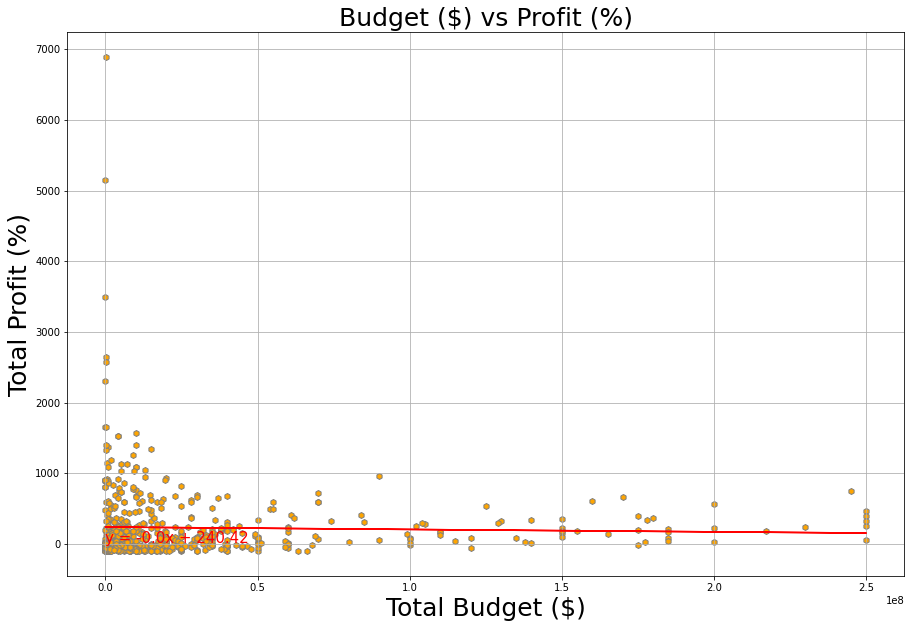

<Figure size 432x288 with 0 Axes>

In [454]:
# Set x and y values _df to extraxt from 
x_values =  budget
y_values =  profit

plt.figure(figsize=(15, 10))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Budget ($) vs Profit (%)", fontsize=25)
plt.xlabel("Total Budget ($)", fontsize=25)
plt.ylabel("Total Profit (%)", fontsize=25)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")


# Display
plt.grid()
plt.show()

# Save scatter plot as png
plt.savefig("Images/budget_profit_scatter_plot.png")

## Budget vs Profit 

With a Pearson's correlation of 0.00 we can state that zero correlation between a movies budget to profit. What we discovered is that the smaller the budget the larger a profit.

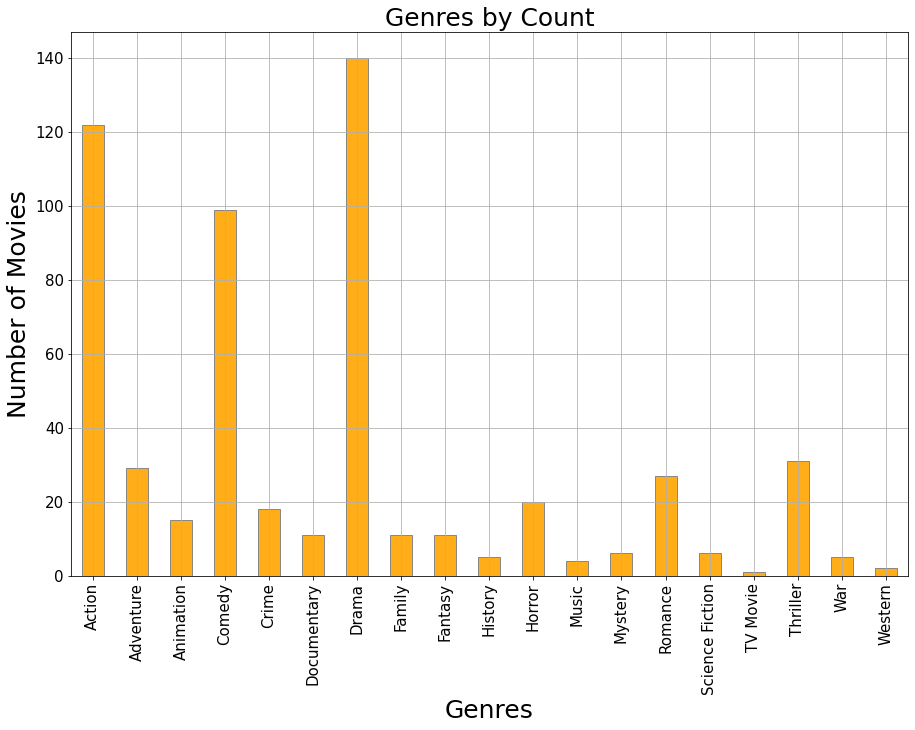

<Figure size 432x288 with 0 Axes>

In [455]:
# Create bar chart using genres_chart 
genres_chart = genres_count.plot(kind='bar', color="orange", edgecolor="gray", figsize=(15, 10), fontsize=15, alpha=0.90)

# Assign labels
genres_chart.set_title("Genres by Count", fontsize=25)
genres_chart.set_xlabel("Genres", fontsize=25)
genres_chart.set_ylabel("Number of Movies", fontsize=25)

# Add grid
plt.grid()

# Display chart with tight_layout()
plt.show()
plt.tight_layout()

# save plot
plt.savefig("Images/genres_by_count_bar_chart.png")

## Genres by Count

Most popular movies being made in out study were Drama with 140 movies, Action with 122 movies, and Comedy with 99 movies. The least popular were TV Movies with 1 movie, Western with 2 movies, and Music with 4 movies.

In [ ]:
# working on a box plot per genre
tick_locations = [value for value in genres]
plt.xticks(tick_locations, genres)
plt.bar(genres, profit, color="gray", align="center" )

In [ ]:
# Set x and y values _df to extraxt from 
x_values =  genres
y_values =  profit

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title("Genres vs Profit ")
plt.xlabel("Genres")
plt.ylabel("Total Profit")

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("")

In [ ]:
# Set x and y values _df to extraxt from 
x_values =  _df[" "]
y_values =  _df[" "]

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Assign labels
plt.title(" ")
plt.xlabel(" ")
plt.ylabel(" ")

# Retrieve r-squared value squared 
#print(f"The r-squared is: {rvalue**2}")

# Display
plt.show()

# Save scatter plot as png
plt.savefig("")

In [ ]:
correlation = sts.pearsonr(volume_weight[" "], volume_weight[" "])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

In [ ]:
'Budget' - 'Revenue'